#Limpeza de dados e transformação do desafio do titanic
O desafio do Kaggle pode ser encontrado no seguinte link: https://www.kaggle.com/c/titanic

Inicialmente será feita uma análise descritiva do desafio:

#Análise descritiva

# a) Identifique os tipos de atributos (contínuos , discretos, binários (simétricos ou assimétricos), categóricos (nominais ou ordinais)). Esta classificação deve ser feita e explicada manualmente.

*   PassengerId: representa um número único que identifica o passageiro no titanic, ele é um atributo **discreto** pois representa uma categoria específica.
*   Survived: representa se o passageiro morreu (1) ou não (0), é uma variável **binária simétrica**, binária pois pode assumir apenas dois valores e simétrica por não possuir hierarquia entre os dois.
*   Pclass: Representa em qual classe econômica estava o passageiro, podendo assumir 3 valores, 1st, 2nd e 3rd ou 1, 2, 3. Representa um atributo **categórico ordinal**, categórico pois rotula em diferentes classes e ordinal por haver hierarquia entre os dados.
*   Name: Nome do tripulante, **categórico nominal** pois rotula uma pessoa mas sem distinção de hierarquia entre seus pares, apenas nomeia.
*   Sex: Sexo do tripulante, podendo ser masulino ou feminino, ele se torna um atributo **binário simétrico**, pois pode assumir dois valores, sem hierarquia entre eles.
* Age: Idade do tripulante, atributo **contínuo** pois pode assumir qualquer valor em um range conhecido de números reais.
* SibSp: Quantidade de parentes, irmãos ou cônjuges abordo, é um atributo **discreto** valor contável e distinto de números inteiros não negativos.
* Parch: Funciona como o anterior mas com o número de pais / filhos abordo, ou seja, **discreto** 
* Ticket: Número do ticket do passageiro, sem distinção pelo valor, apenas categoriza, **categórico nominal**.
* Fare: tarifa paga pelo passageiro, atributo **contínuo** pois tem uma escala de medida em um range de valores reais.
* Cabin: Número da cabine do passageiro, apenas rotula sem hierarquizar, então é considerado **categórico nominal**.
* Embarked: Representa o porto de embarque do passageiro. Esse atributo é um exemplo de atributo **categórico nominal**, pois os valores possíveis são categorias distintas sem uma ordem específica.

#b) Para atributo numérico, identifique qual o seu intervalo de valores, valor médio, máximo, mínimo, desvio-padrão e valores aberrantes. Use funcões do dataframe para isso (por exemplo, describe, mean, sum ,...). Faça gráficos estilo boxplots para visualizar os possíveis outliers. Comente os resultados.

Inicialmente quais atributos numéricos serão levados em consideração?
O passenger ID, ticket e a Cabin, embora sejam numéricos, os valores não representam nada, nenhuma informação seria tirada da análise dos seus valores, assim como saber o valor míninmo, máximo e etc do Survived, tendo isso em vista será feita a análise do: **Pclass, Age, SibSp, Parch e Fare.**

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

dataframe = pd.read_csv('train.csv')
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
def criarGrafico(coluna):
  plt.figure(figsize=(6, 4))
  plt.boxplot(dataframe[coluna], vert=False)

  plt.title(f'Boxplot da coluna {coluna}')
  plt.xlabel('Valor')
  plt.ylabel('')

  plt.show()


In [212]:
def criarInformacoesNumericas(nomeDoAtributo):
  print(f'INFORMAÇÕES SOBRE: {nomeDoAtributo}')

  atributo = dataframe[nomeDoAtributo].describe()
  valorMinimo = atributo['min']
  valorMaximo = atributo['max']
  valorMedio = atributo['mean']
  desvioPadrao = atributo['std']

  print(f'Intervalor de valores: entre {valorMinimo} e {valorMaximo}\nValor mínimo: {valorMinimo}\nValor máximo: {valorMaximo}\nValor médio: {valorMedio}\nDesvio padrao: {desvioPadrao}\n\n')

  criarGrafico(coluna=nomeDoAtributo)

  print("\nIdentificando Valores aberrantes usando Z-score")
  coluna_zscore = np.abs(zscore(dataframe[nomeDoAtributo]))
  limite_zscore = 3
  outliers = dataframe[coluna_zscore > limite_zscore]

  for indice, linha in outliers.iterrows():
    print(f"Id: {linha['PassengerId']}, Valor: {linha[nomeDoAtributo]}")

  print("=====================\n\n")



O método utilizado para encontrar valores aberrantes foi o z - score, que de acordo com um número setado, no caso 3, ele averigua se está distante da média, ou seja, nesse caso ele vê, se o valor dado estiver **3 desvios padrões** distante da média ele é considerado outlier.

INFORMAÇÕES SOBRE: Pclass
Intervalor de valores: entre 1.0 e 3.0
Valor mínimo: 1.0
Valor máximo: 3.0
Valor médio: 2.308641975308642
Desvio padrao: 0.836071240977049




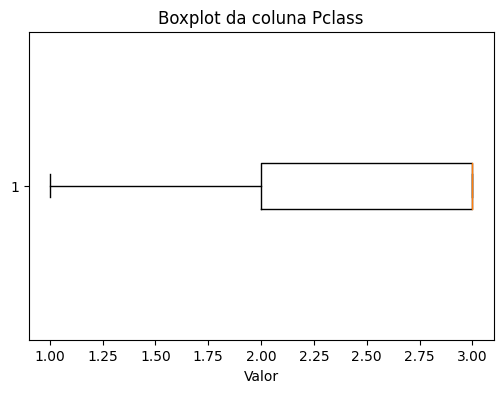


Identificando Valores aberrantes usando Z-score


INFORMAÇÕES SOBRE: Age
Intervalor de valores: entre 0.42 e 80.0
Valor mínimo: 0.42
Valor máximo: 80.0
Valor médio: 29.69911764705882
Desvio padrao: 14.526497332334042




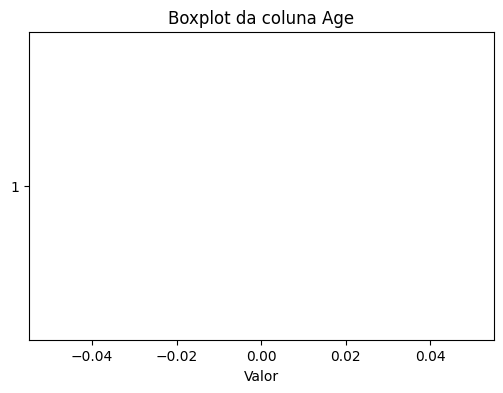


Identificando Valores aberrantes usando Z-score


INFORMAÇÕES SOBRE: SibSp
Intervalor de valores: entre 0.0 e 8.0
Valor mínimo: 0.0
Valor máximo: 8.0
Valor médio: 0.5230078563411896
Desvio padrao: 1.1027434322934317




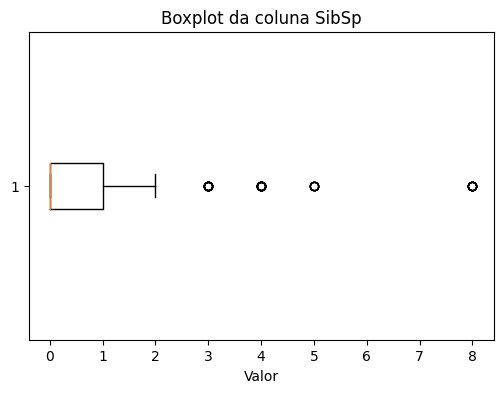


Identificando Valores aberrantes usando Z-score
Id: 17, Valor: 4
Id: 51, Valor: 4
Id: 60, Valor: 5
Id: 69, Valor: 4
Id: 72, Valor: 5
Id: 120, Valor: 4
Id: 160, Valor: 8
Id: 165, Valor: 4
Id: 172, Valor: 4
Id: 181, Valor: 8
Id: 183, Valor: 4
Id: 202, Valor: 8
Id: 234, Valor: 4
Id: 262, Valor: 4
Id: 267, Valor: 4
Id: 279, Valor: 4
Id: 325, Valor: 8
Id: 387, Valor: 5
Id: 481, Valor: 5
Id: 542, Valor: 4
Id: 543, Valor: 4
Id: 684, Valor: 5
Id: 687, Valor: 4
Id: 788, Valor: 4
Id: 793, Valor: 8
Id: 814, Valor: 4
Id: 825, Valor: 4
Id: 847, Valor: 8
Id: 851, Valor: 4
Id: 864, Valor: 8


INFORMAÇÕES SOBRE: Parch
Intervalor de valores: entre 0.0 e 6.0
Valor mínimo: 0.0
Valor máximo: 6.0
Valor médio: 0.38159371492704824
Desvio padrao: 0.8060572211299483




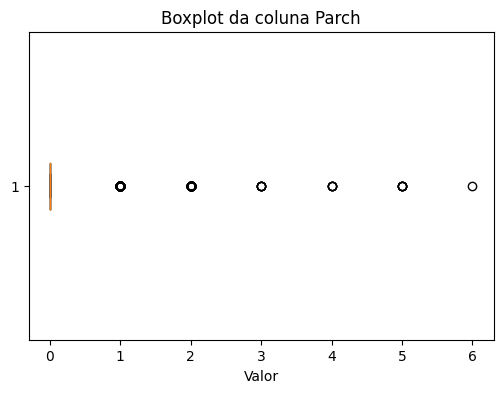


Identificando Valores aberrantes usando Z-score
Id: 14, Valor: 5
Id: 26, Valor: 5
Id: 87, Valor: 3
Id: 168, Valor: 4
Id: 361, Valor: 4
Id: 438, Valor: 3
Id: 439, Valor: 4
Id: 568, Valor: 4
Id: 611, Valor: 5
Id: 639, Valor: 5
Id: 679, Valor: 6
Id: 737, Valor: 3
Id: 775, Valor: 3
Id: 859, Valor: 3
Id: 886, Valor: 5


INFORMAÇÕES SOBRE: Fare
Intervalor de valores: entre 0.0 e 512.3292
Valor mínimo: 0.0
Valor máximo: 512.3292
Valor médio: 32.204207968574636
Desvio padrao: 49.6934285971809




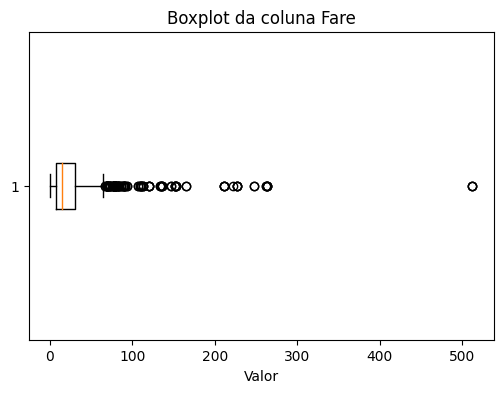


Identificando Valores aberrantes usando Z-score
Id: 28, Valor: 263.0
Id: 89, Valor: 263.0
Id: 119, Valor: 247.5208
Id: 259, Valor: 512.3292
Id: 300, Valor: 247.5208
Id: 312, Valor: 262.375
Id: 342, Valor: 263.0
Id: 378, Valor: 211.5
Id: 381, Valor: 227.525
Id: 439, Valor: 263.0
Id: 528, Valor: 221.7792
Id: 558, Valor: 227.525
Id: 680, Valor: 512.3292
Id: 690, Valor: 211.3375
Id: 701, Valor: 227.525
Id: 717, Valor: 227.525
Id: 731, Valor: 211.3375
Id: 738, Valor: 512.3292
Id: 743, Valor: 262.375
Id: 780, Valor: 211.3375




In [213]:
criarInformacoesNumericas("Pclass")
criarInformacoesNumericas("Age")
criarInformacoesNumericas("SibSp")
criarInformacoesNumericas("Parch")
criarInformacoesNumericas("Fare")

Para os plots de idade e classe não foram encontrados valores aberrantes, a classe realmente não existiria, por estar limitado a um intervalo de valores.


*   Sobre o fare, achamos alguns valores bem distantes da média, no intervalo entre 200-300 e um sendo até 500.
*   Sobre o Parch, os valores mais distantes sondavam 3 até 6 filhos, ou pais no caso
* E sobre o Sibsb os valores aberrantes estiveram entre 4 e 8 irmão ou cônjuges abordo do navio.



# c) Para os atributos binários, nominais e ordinais, indique quais os valores possíveis e a popularidade (distribuição de probabilidade) de cada.

Os atributos binários que iremos explorar é Survived (0 se nao morreu e 1 se morreu) e Sex (male para homem e female para mulher).

In [214]:
def distribuicaoDeProbabilidade(atributo):
  distribuicao = dataframe[atributo].value_counts(normalize=True)
  print(distribuicao)
  print("\n\n")


In [215]:
distribuicaoDeProbabilidade("Sex")
distribuicaoDeProbabilidade("Survived")

male      0.647587
female    0.352413
Name: Sex, dtype: float64



0    0.616162
1    0.383838
Name: Survived, dtype: float64





#d) Identifique os valores ausentes (isna ou isnull), aberrantes e inconsistências.

In [216]:
def valoresInconsistentes():
  valores_ausentes = dataframe.isnull().sum()

  colunas_desejadas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
  dataframe_filtrado = dataframe[colunas_desejadas]

  coluna_zscore = np.abs(zscore(dataframe_filtrado))
  limite_zscore = 3
  outliers = (coluna_zscore > limite_zscore)

  quantidade_outliers = outliers.sum()

  tabela = pd.DataFrame({'Aberrantes': quantidade_outliers, 'Valores Ausentes': valores_ausentes})
  tabela['Aberrantes'] = tabela['Aberrantes'].replace(np.nan, 0)

  print(tabela)

valoresInconsistentes()

             Aberrantes  Valores Ausentes
Age                 0.0               177
Cabin               0.0               687
Embarked            0.0                 2
Fare               20.0                 0
Name                0.0                 0
Parch              15.0                 0
PassengerId         0.0                 0
Pclass              0.0                 0
Sex                 0.0                 0
SibSp              30.0                 0
Survived            0.0                 0
Ticket              0.0                 0


# e) Verifique e comente a correlação entre os atributos numéricos (corr).



In [217]:
colunas_desejadas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
dataframe_filtrado = dataframe[colunas_desejadas]

correlation_matrix = dataframe_filtrado.corr()
print(correlation_matrix)


          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000


A matriz de correlação é uma tabela quadrada, em que os valores na diagonal principal representam a correlação de cada atributo consigo mesmo (que é sempre 1.0). Os valores fora da diagonal principal indicam a correlação entre pares de atributos.

Você pode interpretar os valores da matriz de correlação da seguinte forma:

Valores próximos a 1.0 indicam uma correlação positiva forte.
Valores próximos a -1.0 indicam uma correlação negativa forte.
Valores próximos a 0 indicam uma correlação fraca ou nenhuma correlação.

#Limpeza de dados e transformação

#a) Preencha os valores ausentes (Tente atribuir o valor mais provável).

In [218]:
# Para a idade, atribuirei a média nos valores faltantes
dataframe['Age'].fillna(dataframe['Age'].mean(), inplace=True)

# Como a cabin não há relacao entre os atributos la dentro, sera preenchido com a moda entre os valores
dataframe['Cabin'].fillna(dataframe['Cabin'].mode()[0], inplace=True)

# Mesmo esquema para o Embarked
dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace=True)
valoresInconsistentes()


             Aberrantes  Valores Ausentes
Age                 7.0                 0
Cabin               0.0                 0
Embarked            0.0                 0
Fare               20.0                 0
Name                0.0                 0
Parch              15.0                 0
PassengerId         0.0                 0
Pclass              0.0                 0
Sex                 0.0                 0
SibSp              30.0                 0
Survived            0.0                 0
Ticket              0.0                 0


#b) Suavize os ruídos (use o qcut ou cut para dividir os bins).

In [219]:
# Vou suavizar os atributos Fare, age usando a média móvel e intervalos pré definidos

def suavizarMediaMovel():
  janela = 20
  dataframe['Age'] = dataframe['Age'].rolling(window=janela, min_periods=1).mean()
  dataframe['Fare'] = dataframe['Fare'].rolling(window=janela, min_periods=1).mean()

def suavizarComIntervalo():
  binsIdade = [0, 18, 30, 50, float('inf')]
  labelsIdade = ['0-17', '18-29', '30-49', '50+']

  binsFare = [0, 50, 100, 150, 200, 300, float('inf')]
  labelsFare = ['0-50', '50-100', '100-150', '150-200', '200-300', '300+']

  dataframe['Faixa Etária'] = pd.cut(dataframe['Age'], bins=binsIdade, labels=labelsIdade, right=False)
  dataframe['Faixa Fare'] = pd.cut(dataframe['Fare'], bins=binsFare, labels=labelsFare, right=False)

suavizarMediaMovel()
# suavizarComIntervalo()
# valoresInconsistentes()
dataframe.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30.000000,1,0,PC 17599,39.266650,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,28.666667,0,0,STON/O2. 3101282,28.819433,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30.250000,1,0,113803,34.889575,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,31.200000,0,0,373450,29.521660,B96 B98,S


#     c) Resolva as inconsistências, se houver.



Na minha opinião não houve inconsistências, não após remover ruídos e preencher valores faltantes

#      d) Transforme atributos categóricos nominais em um vetor numérico (por exemplo, usando o OneHotEncoder).



In [220]:
# Aqui o que faz sentido é a Cabin, pois seria a que repete em algum possivel caso, diferente do nome e do
# ticket que são únicos

encoder = OneHotEncoder()

atributos_categoricos = ['Cabin']
atributos_encoded = encoder.fit_transform(dataframe[atributos_categoricos]).toarray()

dataframe_encoded = pd.DataFrame(atributos_encoded, columns=encoder.get_feature_names_out(atributos_categoricos))

dataframe_encoded.head()

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# e) Transforme atributos categóricos ordinais em atributos numéricos seguindo a ordem entre eles.





In [222]:
train_path = dataframe.sort_values(by='Pclass').reset_index(drop=True)

print("train_path:")
print(train_path['Pclass']) 

train_path:
0      1
1      1
2      1
3      1
4      1
      ..
886    3
887    3
888    3
889    3
890    3
Name: Pclass, Length: 891, dtype: int64


# f) Normalize os valores de atributos numéricos.



In [225]:
atributos_numericos = ['Age', 'Fare']

scaler = MinMaxScaler()

dataframe[atributos_numericos] = scaler.fit_transform(dataframe[atributos_numericos])

print("train_path:")
print(dataframe.head()) 

train_path:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
2                             Heikkinen, Miss. Laina  female  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
4                           Allen, Mr. William Henry    male  0.434531      0   

   Parch            Ticket      Fare Cabin Embarked  
0      0         A/5 21171  0.014151   NaN        S  
1      0          PC 17599  0.139136   C85        C  
2      0  STON/O2. 3101282  0.015469   NaN        S  
3      0            113803  0.103644  C123        S  
4      0      